In [1]:
# Import packages
from keras.datasets import cifar10
from matplotlib import pyplot
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

/home/mrmad/anaconda3/envs/dl/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# check dataset shape
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
#Input image dimensions
img_rows, img_cols = 32, 32

if K.image_data_format() == 'channels_first':
    x_train_modified = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test_modified = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train_modified = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test_modified = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# convert from int to float
x_train_final = x_train_modified.astype('float32')
x_test_final = x_test_modified.astype('float32')

print('x_train shape:', x_train_final.shape)
print(x_train_final.shape[0], 'train samples')
print(x_test_final.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


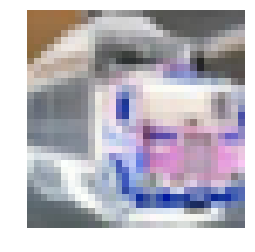

In [4]:
## plot sample image no.9 from original dataset
num = 14

#pyplot.title('Label: %d' % (y_train[num]))
pyplot.imshow(x_train_final[num])
pyplot.axis('off')
pyplot.show()

/home/mrmad/anaconda3/envs/dl/lib/python3.5/site-packages/keras/preprocessing/image.py:492: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


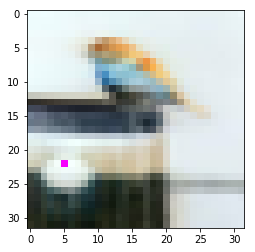

In [15]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)

# fit parameters from data
datagen.fit(x_train_final)

# configure batch size and retrieve one batch of images
# save images into file

os.makedirs('cifar10_images_zca')
i=1


for X_batch, y_batch in datagen.flow(x_train_final, y_train,batch_size =1,save_to_dir='cifar10_images_zca', save_prefix='zca', save_format='png'):
    i += 1
    if i >50000:
        break  # otherwise the generator would loop indefinitely

In [6]:
# Random Rotations
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)

# fit parameters from data
datagen.fit(x_train_final)

os.makedirs('cifar10_images_rotation')
i=1

for X_batch, y_batch in datagen.flow(x_train_final, y_train,batch_size =1,save_to_dir='cifar10_images_rotation', save_prefix='rot', save_format='png'):
    i += 1
    if i >50000:
        break  # otherwise the generator would loop indefinitely

In [7]:
# Random Flips

# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# fit parameters from data
datagen.fit(x_train_final)

os.makedirs('cifar10_images_flips')
i=1

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train_final, y_train,batch_size =1,save_to_dir='cifar10_images_flips', save_prefix='flips', save_format='png'):
    i += 1
    if i >50000:
        break  # otherwise the generator would loop indefinitely